<a href="https://colab.research.google.com/github/chelseawmk/Medical-Insurance-Fraud-Detection/blob/main/Medical%20Insurance%20Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Medical Insurance Fraud Investigation

analyze the data (using the tools of your choice) and make a recommendation on the criteria that should be used to select which medical providers are
audited.

Healthcare fraud and abuse can take many forms. Some of the most common types of fraud by providers are:

* Billing for services that were not provided
* Duplicate submission of a claim for the same service
* Misrepresenting the service provided
* Charging for a more complex or expensive service than was actually provided
* Billing for a covered service when the service actually provided was not covered

### Load packages

In [ ]:
# data viz and dataframe handling packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

#file handling
import os
from google.colab import (files,drive)

# data preprocessing
from sklearn.preprocessing import StandardScaler

# train test split
from sklearn.model_selection import train_test_split

# machine learning model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# model selection
from sklearn.model_selection import GridSearchCV

# model evaluation
from sklearn.metrics import (confusion_matrix,plot_confusion_matrix,plot_roc_curve,classification_report,accuracy_score,confusion_matrix)


### Import Data

In [ ]:
drive.mount('/content/gdrive', force_remount=True)
path = "/content/gdrive/"
os.chdir(path)

Mounted at /content/gdrive


In [ ]:
# read raw data csv
directory = os.getcwd()
directory = directory + "/My Drive/Project/2020 UTMMA hackthon"

#warnings.filterwarnings("ignore") 
providers=pd.read_csv(directory + "/providers.csv")
inpatients=pd.read_csv(directory + "/inpatients.csv")
outpatients=pd.read_csv(directory + "/outpatients.csv")
beneficiary=pd.read_csv(directory + "/beneficiary.csv")

In [ ]:
data_full=pd.read_csv(directory + "/Junduo - data pre-process/fullPatientData.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (12,22) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
data_full.columns

Index(['Unnamed: 0', 'PID', 'BID', 'CID', 'StartDt', 'EndDt', 'AmtReimbursed',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'AdmitDiagnosisCode', 'DeductibleAmt', 'DiagnosisGroupCode',
       'DiagnosisCode_1', 'DiagnosisCode_2', 'DiagnosisCode_3',
       'DiagnosisCode_4', 'DiagnosisCode_5', 'DiagnosisCode_6',
       'DiagnosisCode_7', 'DiagnosisCode_8', 'DiagnosisCode_9',
       'DiagnosisCode_10', 'ProcedureCode_1', 'ProcedureCode_2',
       'ProcedureCode_3', 'ProcedureCode_4', 'ProcedureCode_5',
       'ProcedureCode_6', 'ClaimDays', 'Admitdays', 'NumberOfDiagnosis',
       'NumberOfProcedures', 'NumberOfPhysicians', 'NumberOfBID',
       'NumberOfCID', 'NumberOfDistinctBID', 'NumberOfDistinctCID',
       'Number.of.BID...Number.of.DisitnctBID',
       'Number.of.CID...Number.of.DisitnctCID', 'Fraud', 'DOB', 'DOD',
       'Gender', 'Race', 'RenalDisease', 'State', 'County',
       'NumOfMonths_PartACov', 'NumOfMonths_PartBCov', 'Chronic_Alzheimer',
 

### Data Preprocessing 
* aggregate key metrics to provider level


In [ ]:
col=['PID','BID','AmtReimbursed','DeductibleAmt','ClaimDays', 'Admitdays', 'NumberOfDiagnosis',
     'NumberOfProcedures', 'NumberOfPhysicians', 'NumberOfBID','NumberOfCID', 
     'NumberOfDistinctBID', 'NumberOfDistinctCID','Fraud','NumOfMonths_PartACov', 
     'NumOfMonths_PartBCov', 
    #  'Chronic_Alzheimer','RenalDisease',
    #   'Chronic_Heartfailure', 'Chronic_KidneyDisease', 'Chronic_Cancer',
    #   'Chronic_ObstrPulmonary', 'Chronic_Depression', 'Chronic_Diabetes',
    #   'Chronic_IschemicHeart', 'Chronic_Osteoporasis',
    #   'Chronic_rheumatoidarthritis', 'Chronic_stroke',
      'InpatientAnnualReimbursementAmt', 'InpatientAnnualDeductibleAmt',
      'OutpatientAnnualReimbursementAmt', 'OutpatientAnnualDeductibleAmt',
      'Age'
     ]
data_sub=data_full.loc[:,data_full.columns.isin(col)]

In [ ]:
data_sub=data_sub.merge(beneficiary[['BID','Chronic_Alzheimer','RenalDisease',
      'Chronic_Heartfailure', 'Chronic_KidneyDisease', 'Chronic_Cancer',
      'Chronic_ObstrPulmonary', 'Chronic_Depression', 'Chronic_Diabetes',
      'Chronic_IschemicHeart', 'Chronic_Osteoporasis',
      'Chronic_rheumatoidarthritis', 'Chronic_stroke']],how= 'inner', on='BID')

In [ ]:
data_sub[['Chronic_Alzheimer',
      'Chronic_Heartfailure', 'Chronic_KidneyDisease', 'Chronic_Cancer',
      'Chronic_ObstrPulmonary', 'Chronic_Depression', 'Chronic_Diabetes',
      'Chronic_IschemicHeart', 'Chronic_Osteoporasis',
      'Chronic_rheumatoidarthritis', 'Chronic_stroke']]=data_sub[['Chronic_Alzheimer',
      'Chronic_Heartfailure', 'Chronic_KidneyDisease', 'Chronic_Cancer',
      'Chronic_ObstrPulmonary', 'Chronic_Depression', 'Chronic_Diabetes',
      'Chronic_IschemicHeart', 'Chronic_Osteoporasis',
      'Chronic_rheumatoidarthritis', 'Chronic_stroke']].replace(2,1)
data_sub['RenalDisease']=data_sub['RenalDisease'].replace('Y',1)

In [ ]:
data_sub.describe()
#no bid/cid/ distinct??? 

,AmtReimbursed,DeductibleAmt,ClaimDays,Admitdays,NumberOfDiagnosis,NumberOfProcedures,NumberOfPhysicians,NumberOfBID,NumberOfCID,NumberOfDistinctBID,NumberOfDistinctCID,NumOfMonths_PartACov,NumOfMonths_PartBCov,InpatientAnnualReimbursementAmt,InpatientAnnualDeductibleAmt,OutpatientAnnualReimbursementAmt,OutpatientAnnualDeductibleAmt,Age,Chronic_Alzheimer,Chronic_Heartfailure,Chronic_KidneyDisease,Chronic_Cancer,Chronic_ObstrPulmonary,Chronic_Depression,Chronic_Diabetes,Chronic_IschemicHeart,Chronic_Osteoporasis,Chronic_rheumatoidarthritis,Chronic_stroke
count,558211.000000,557312.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.00000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.0,558211.0,558211.0,558211.0,558211.0,558211.0,558211.0,558211.0,558211.0,558211.0,558211.0
mean,997.012133,78.421085,1.727940,0.483269,3.010897,0.053557,1.560138,783.051608,783.051608,397.426948,783.051608,11.931472,11.93877,5227.971466,568.756807,2278.225348,649.698745,73.769770,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,3821.534891,274.016812,4.904984,2.300583,2.448213,0.280534,0.639954,1271.870746,1271.870746,527.371409,1271.870746,0.889712,0.78590,11786.274732,1179.172616,3881.846386,1002.020811,13.022524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,-8000.000000,0.000000,-70.000000,0.000000,26.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,40.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,100.000000,100.000000,70.000000,100.000000,12.000000,12.00000,0.000000,0.000000,460.000000,120.000000,68.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,80.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,310.000000,310.000000,190.000000,310.000000,12.000000,12.00000,0.000000,0.000000,1170.000000,340.000000,75.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,300.000000,0.000000,0.000000,0.000000,4.000000,0.000000,2.000000,934.000000,934.000000,509.000000,934.000000,12.000000,12.00000,6000.000000,1068.000000,2590.000000,790.000000,82.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,125000.000000,1068.000000,36.000000,36.000000,10.000000,5.000000,3.000000,8240.000000,8240.000000,2857.000000,8240.000000,12.000000,12.00000,161470.000000,38272.000000,102960.000000,13840.000000,101.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
len(data_sub)

558211

In [ ]:
df_sum=data_sub.groupby('PID')[['RenalDisease', 'Chronic_Alzheimer',
      'Chronic_Heartfailure', 'Chronic_KidneyDisease', 'Chronic_Cancer',
      'Chronic_ObstrPulmonary', 'Chronic_Depression', 'Chronic_Diabetes',
      'Chronic_IschemicHeart', 'Chronic_Osteoporasis',
      'Chronic_rheumatoidarthritis', 'Chronic_stroke']].sum()
df_mean=data_sub.groupby('PID')[['AmtReimbursed','DeductibleAmt','ClaimDays', 'Admitdays', 'NumberOfDiagnosis',
     'NumberOfProcedures', 'NumberOfPhysicians','NumberOfDistinctBID', 'NumberOfDistinctCID','InpatientAnnualReimbursementAmt', 'InpatientAnnualDeductibleAmt',
      'OutpatientAnnualReimbursementAmt', 'OutpatientAnnualDeductibleAmt',
      'Age']].mean()

In [ ]:
len(df_mean)

5410

In [ ]:
len(df_sum)

5410

In [ ]:
df_model=df_sum.merge(df_mean,how='inner',on='PID').merge(providers,how='inner',on='PID')
df_model.describe()
## chronic_x same value?

,Chronic_Alzheimer,Chronic_Heartfailure,Chronic_KidneyDisease,Chronic_Cancer,Chronic_ObstrPulmonary,Chronic_Depression,Chronic_Diabetes,Chronic_IschemicHeart,Chronic_Osteoporasis,Chronic_rheumatoidarthritis,Chronic_stroke,AmtReimbursed,DeductibleAmt,ClaimDays,Admitdays,NumberOfDiagnosis,NumberOfProcedures,NumberOfPhysicians,NumberOfDistinctBID,NumberOfDistinctCID,InpatientAnnualReimbursementAmt,InpatientAnnualDeductibleAmt,OutpatientAnnualReimbursementAmt,OutpatientAnnualDeductibleAmt,Age
count,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5409.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000
mean,103.181331,103.181331,103.181331,103.181331,103.181331,103.181331,103.181331,103.181331,103.181331,103.181331,103.181331,1740.679369,155.643175,2.013987,0.984472,3.407356,0.108011,1.580210,60.545306,94.509272,6166.692586,666.980865,2199.335651,629.095618,73.731027
std,272.456989,272.456989,272.456989,272.456989,272.456989,272.456989,272.456989,272.456989,272.456989,272.456989,272.456989,3484.473124,306.489453,2.057721,2.205995,1.727429,0.246305,0.234654,134.108255,262.280415,6203.422910,623.108956,1301.128843,344.104149,4.712307
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,34.000000
25%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,232.394593,0.312500,0.875000,0.000000,2.500000,0.000000,1.500000,8.000000,9.000000,2902.238095,356.000000,1547.500000,459.656897,71.768368
50%,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,356.085106,4.285714,1.586207,0.000000,2.814550,0.000000,1.571429,22.000000,27.229032,4729.047927,527.580008,2044.355263,592.510504,73.863636
75%,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,1490.154301,137.418605,2.544613,0.804454,3.567646,0.083333,1.666667,56.183437,77.000000,7336.173195,801.000000,2557.354123,726.026854,75.760000
max,8240.000000,8240.000000,8240.000000,8240.000000,8240.000000,8240.000000,8240.000000,8240.000000,8240.000000,8240.000000,8240.000000,57000.000000,1068.000000,35.000000,36.000000,10.000000,3.000000,3.000000,2857.000000,8240.000000,103000.000000,12068.000000,22853.333333,6070.000000,101.000000


In [ ]:
outpatients['PID'].nunique()

5012

In [ ]:
bene=beneficiary.merge(inpatients[['BID','PID']],how='outer',on='BID').merge(outpatients[['BID','PID']],how='outer',on='BID')

In [ ]:
bene['PID']=np.where(bene['PID_x'].isnull(),bene['PID_y'],bene['PID_x'])

In [ ]:
bene['RenalDisease']=bene['RenalDisease'].replace('Y',1)


In [ ]:
bene_sum=bene.groupby('PID')[['Chronic_Alzheimer',
       'Chronic_Heartfailure', 'Chronic_KidneyDisease', 'Chronic_Cancer',
       'Chronic_ObstrPulmonary', 'Chronic_Depression', 'Chronic_Diabetes',
       'Chronic_IschemicHeart', 'Chronic_Osteoporasis',
       'Chronic_rheumatoidarthritis', 'Chronic_stroke','RenalDisease']].sum()

In [ ]:
bene_sum.describe()

,Chronic_Alzheimer,Chronic_Heartfailure,Chronic_KidneyDisease,Chronic_Cancer,Chronic_ObstrPulmonary,Chronic_Depression,Chronic_Diabetes,Chronic_IschemicHeart,Chronic_Osteoporasis,Chronic_rheumatoidarthritis,Chronic_stroke
count,5365.000000,5365.000000,5365.000000,5365.000000,5365.000000,5365.000000,5365.000000,5365.00000,5365.000000,5365.000000,5365.000000
mean,168.529357,148.264492,166.734762,196.150979,177.370736,165.185275,136.462628,131.00876,178.394408,178.858527,201.162162
std,397.118817,351.877519,396.379167,460.004789,420.236694,390.331791,322.905167,309.95031,418.747446,420.204996,472.836238
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
25%,17.000000,15.000000,17.000000,20.000000,18.000000,17.000000,14.000000,13.00000,18.000000,18.000000,20.000000
50%,53.000000,47.000000,52.000000,62.000000,56.000000,52.000000,43.000000,42.00000,56.000000,56.000000,63.000000
75%,151.000000,133.000000,149.000000,175.000000,157.000000,147.000000,120.000000,117.00000,158.000000,158.000000,178.000000
max,10616.000000,9631.000000,10861.000000,12115.000000,11523.000000,10375.000000,8710.000000,8469.00000,11075.000000,11161.000000,12498.000000


In [ ]:
data_model=bene_sum.merge(df_mean,how='inner',on='PID').merge(providers,how='inner',on='PID').drop('PID',axis=1)

In [ ]:
data_model=data_model.fillna(0)

In [40]:
df_ip=inpatients.groupby('PID')['BID'].count()
df_ip_u=inpatients.groupby('PID')['BID'].nunique()

In [38]:
providers[providers['PID']=='PRV51459']

,PID,Fraud
363,PRV51459,Yes


## EDA

In [ ]:
#correlation matrix
data_model.corr().style.background_gradient(cmap=plt.cm.Blues)

,Chronic_Alzheimer,Chronic_Heartfailure,Chronic_KidneyDisease,Chronic_Cancer,Chronic_ObstrPulmonary,Chronic_Depression,Chronic_Diabetes,Chronic_IschemicHeart,Chronic_Osteoporasis,Chronic_rheumatoidarthritis,Chronic_stroke,AmtReimbursed,DeductibleAmt,ClaimDays,Admitdays,NumberOfDiagnosis,NumberOfProcedures,NumberOfPhysicians,NumberOfDistinctBID,NumberOfDistinctCID,InpatientAnnualReimbursementAmt,InpatientAnnualDeductibleAmt,OutpatientAnnualReimbursementAmt,OutpatientAnnualDeductibleAmt,Age
Chronic_Alzheimer,1.000000,0.999066,0.998825,0.998990,0.999164,0.999248,0.999323,0.999299,0.998945,0.999096,0.999215,0.001680,0.006109,0.007308,0.002276,0.004940,0.003484,-0.011842,0.905463,0.922041,0.010212,0.010521,0.017986,0.015290,0.005204
Chronic_Heartfailure,0.999066,1.000000,0.999434,0.998188,0.999461,0.998963,0.999463,0.999409,0.998230,0.998607,0.998555,-0.004311,-0.000791,0.002761,-0.003963,-0.001525,-0.002633,-0.013078,0.911183,0.930093,0.005272,0.005644,0.017594,0.015031,0.004861
Chronic_KidneyDisease,0.998825,0.999434,1.000000,0.997616,0.999411,0.998633,0.999315,0.999137,0.997694,0.998116,0.998047,-0.008458,-0.005710,-0.000376,-0.008343,-0.006052,-0.006983,-0.014546,0.914732,0.933773,0.001731,0.002286,0.017485,0.014841,0.004825
Chronic_Cancer,0.998990,0.998188,0.997616,1.000000,0.998293,0.999104,0.998650,0.998821,0.999476,0.999437,0.999655,0.009386,0.015902,0.013419,0.010851,0.014003,0.011740,-0.010137,0.896901,0.910877,0.016969,0.017719,0.018214,0.015033,0.005399
Chronic_ObstrPulmonary,0.999164,0.999461,0.999411,0.998293,1.000000,0.998969,0.999396,0.999380,0.998344,0.998651,0.998597,-0.003590,-0.000027,0.003276,-0.003313,-0.000764,-0.001960,-0.013080,0.910713,0.929627,0.005606,0.006012,0.018119,0.015415,0.004910
Chronic_Depression,0.999248,0.998963,0.998633,0.999104,0.998969,1.000000,0.999245,0.999202,0.999114,0.999260,0.999296,0.002727,0.007674,0.008274,0.003651,0.006397,0.004819,-0.011615,0.903549,0.919945,0.011536,0.012300,0.018369,0.015739,0.005545
Chronic_Diabetes,0.999323,0.999463,0.999315,0.998650,0.999396,0.999245,1.000000,0.999508,0.998671,0.998982,0.998967,-0.002488,0.001469,0.004326,-0.001874,0.000515,-0.000778,-0.012577,0.908929,0.927067,0.006814,0.007545,0.017627,0.014967,0.004864
Chronic_IschemicHeart,0.999299,0.999409,0.999137,0.998821,0.999380,0.999202,0.999508,1.000000,0.998778,0.999043,0.999066,-0.001133,0.003158,0.005192,-0.000415,0.002128,0.000670,-0.012459,0.907205,0.925457,0.008067,0.008847,0.017802,0.015024,0.004881
Chronic_Osteoporasis,0.998945,0.998230,0.997694,0.999476,0.998344,0.999114,0.998671,0.998778,1.000000,0.999337,0.999487,0.008952,0.015289,0.013055,0.010381,0.013520,0.011142,-0.010252,0.897197,0.912138,0.016783,0.017652,0.018046,0.015097,0.005343
Chronic_rheumatoidarthritis,0.999096,0.998607,0.998116,0.999437,0.998651,0.999260,0.998982,0.999043,0.999337,1.000000,0.999522,0.006873,0.012827,0.011445,0.008102,0.011223,0.009032,-0.010743,0.900547,0.915458,0.015386,0.015752,0.018313,0.015337,0.005416


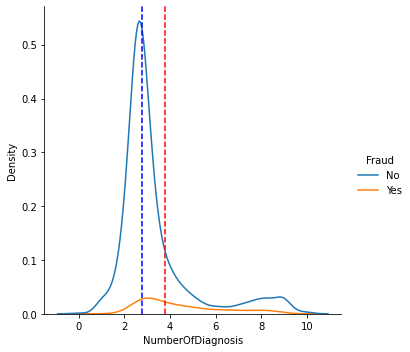

In [47]:
sns.displot(data_model, x="NumberOfDiagnosis", hue="Fraud",kind="kde")
plt.axvline(np.median(data_model[data_model['Fraud']=='Yes']['NumberOfDiagnosis']),color='red', linestyle='--')
plt.axvline(np.median(data_model[data_model['Fraud']=='No']['NumberOfDiagnosis']),color='blue', linestyle='--')

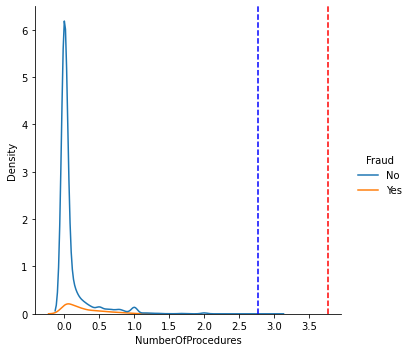

In [ ]:
sns.displot(data_model, x="NumberOfProcedures", hue="Fraud",kind="kde")
plt.axvline(np.median(data_model[data_model['Fraud']=='Yes']['NumberOfDiagnosis']),color='red', linestyle='--')
plt.axvline(np.median(data_model[data_model['Fraud']=='No']['NumberOfDiagnosis']),color='blue', linestyle='--')

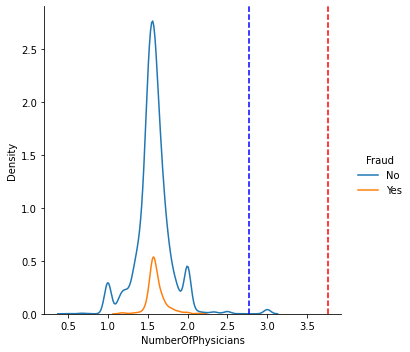

In [42]:
sns.displot(data_model, x="NumberOfPhysicians", hue="Fraud",kind="kde")
plt.axvline(np.median(data_model[data_model['Fraud']=='Yes']['NumberOfDiagnosis']),color='red', linestyle='--')
plt.axvline(np.median(data_model[data_model['Fraud']=='No']['NumberOfDiagnosis']),color='blue', linestyle='--')

In [44]:
data_model.to_csv(directory + "/data_viz.csv")

## Model

In [ ]:
#split train test 
def split_data(df):
  X = df[[i for i in df.columns if i not in target_col]]
  y = df[target_col]
  std = StandardScaler()                 # scale numeric columns
  X = pd.DataFrame(std.fit_transform(X),columns=X.columns)
  return train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
#split data
target_col='Fraud'
X_train,X_test, y_train,y_test=split_data(data_model)

In [ ]:
def model_prediction(algorithm, X_train, X_test, y_train):
  algorithm_fit = algorithm.fit(X_train, y_train)
  # get importance
  importance = algorithm_fit.coef_[0]
  # summarize feature importance
  for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (X_train.columns[i],v))
  # plot feature importance
  plt.bar([x for x in range(len(importance))], importance)
  plt.show()
  predictions  = algorithm.predict(X_test)
  probabilities = algorithm.predict_proba(X_test)
  return algorithm_fit, predictions, probabilities

In [ ]:
def prediction(algorithm, X_train, X_test, y_train, y_test) :
    
    # model prediction
    algorithm_fit, predictions, probabilities = model_prediction(algorithm, X_train, X_test, y_train)

    # print summary
    print ("\n Classification report : \n", classification_report(y_test, predictions))
    print ("Accuracy   Score : ", accuracy_score(y_test, predictions))

    # plot confusion matrix 
    plot_confusion_matrix(algorithm_fit, X_test, y_test, cmap=plt.cm.Blues,display_labels=['No Fraud','Potential Fraud'])
    plt.title('Confusion Matrix')
    
    # plot roc curve
    plot_roc_curve(algorithm_fit, X_test, y_test)
    ax = plt.gca()
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r')
    plt.title('Receiver Operating Characteristic')
    

### Logistic Regression

Feature: Chronic_Alzheimer, Score: 0.95966
Feature: Chronic_Heartfailure, Score: -0.35597
Feature: Chronic_KidneyDisease, Score: 0.07533
Feature: Chronic_Cancer, Score: 1.20014
Feature: Chronic_ObstrPulmonary, Score: 0.08697
Feature: Chronic_Depression, Score: 0.12865
Feature: Chronic_Diabetes, Score: 0.94497
Feature: Chronic_IschemicHeart, Score: 0.33955
Feature: Chronic_Osteoporasis, Score: 0.32602
Feature: Chronic_rheumatoidarthritis, Score: 0.31184
Feature: Chronic_stroke, Score: -0.13052
Feature: AmtReimbursed, Score: 0.11202
Feature: DeductibleAmt, Score: 0.14912
Feature: ClaimDays, Score: 0.03485
Feature: Admitdays, Score: 0.14283
Feature: NumberOfDiagnosis, Score: -0.04407
Feature: NumberOfProcedures, Score: 0.06881
Feature: NumberOfPhysicians, Score: -0.13070
Feature: NumberOfDistinctBID, Score: -0.93052
Feature: NumberOfDistinctCID, Score: -1.26734
Feature: InpatientAnnualReimbursementAmt, Score: 0.10458
Feature: InpatientAnnualDeductibleAmt, Score: 0.01375
Feature: Outpatien

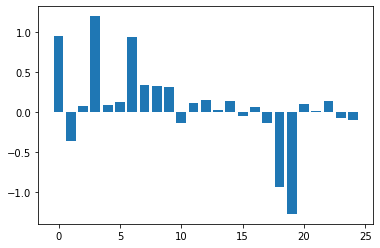


 Classification report : 
               precision    recall  f1-score   support

          No       0.95      0.98      0.96      1229
         Yes       0.69      0.38      0.49       113

    accuracy                           0.93      1342
   macro avg       0.82      0.68      0.73      1342
weighted avg       0.92      0.93      0.92      1342

Accuracy   Score :  0.9336810730253353


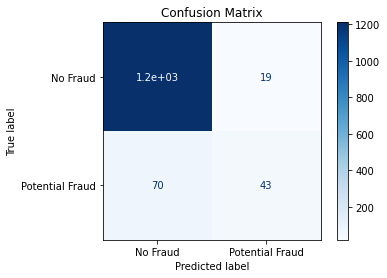

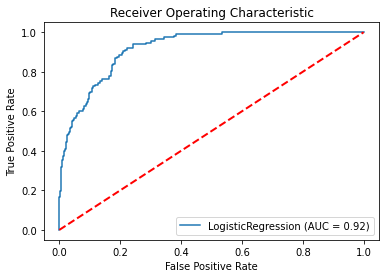

In [ ]:
##logistic regression classifier with hyperparameter tuning using GridSearchCV
parameters = {'penalty' : ['l1', 'l2'], 'C' : np.logspace(-4, 4, 20)}
logit = LogisticRegression(random_state=0)
prediction(logit,X_train, X_test, y_train, y_test)